# FIT5201_2018S2 Assignment 1 - Section A - Question 1

- <font color='blue'>**Student Id**</font>: 27771539
- <font color='blue'>**Student Name**</font>: Chuangfu Xie
- <font color='blue'>**Packages in use**</font>:
    - `repr`: Provide more control on graphical presentation
    - `ggplot2`: Data visualization package
    - `reshape2`: reshape data

## 0. Import packages:

In [1]:
library(repr)
library(ggplot2)
library(reshape2)

## 1. Implement the KNN regressor function:

### 1.1 Load CSVs

In [2]:
train <- read.csv("./datasets/Task1A_train.csv")
test <- read.csv("./datasets/Task1A_test.csv")

### 1.2 Plot and Check datasets

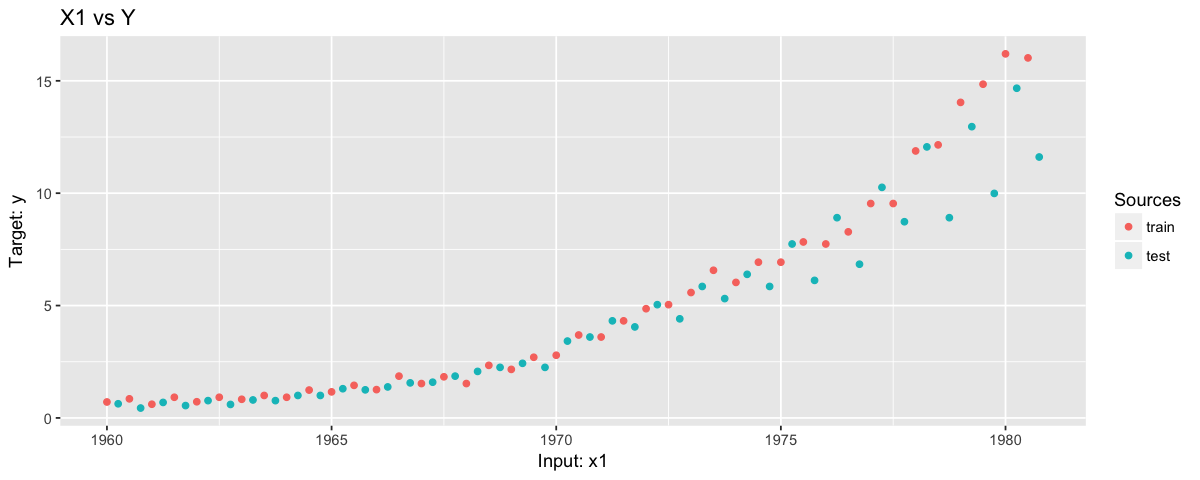

In [3]:
# Add tag
train_add_tag <- cbind(train, 'tag'= matrix('train', nrow(train), 1)) 
test_add_tag <- cbind(test, 'tag' = matrix('test', nrow(train), 1))
# Combine by row
data_for_plot <- rbind(train_add_tag, test_add_tag)
# do plot
options(repr.plot.width=10, repr.plot.height=4) # reset the size of plot
ggplot(data=data_for_plot, aes(x=data_for_plot$x1, y=data_for_plot$y, color=data_for_plot$tag)) + 
    geom_point() + labs(x='Input: x1', y='Target: y', color="Sources") + ggtitle("X1 vs Y")

### 1.3 The KNN function

In [4]:
knn <- function(train.data, train.label, test.data, K=3){
    # get length
    train.len <- nrow(train.data); test.len <- nrow(test.data)
    
    # Use 'Manhattan' distance
    temp <- as.matrix(dist(rbind(test.data, train.data), method = 'manhattan'))
    dist <- temp[1:test.len, (test.len+1):(test.len + train.len)]
    
    for (i in 1:test.len){
        # find its K nearest neighbours
        sorted_dist_each_row <- sort(dist[i,], index.return = TRUE)
        # get index of its knn
        nn_index <- as.data.frame(sorted_dist_each_row)[1:K,2]
        # get the mean of its knn target value and assign
        test.data$y[i] <- mean(train.label[nn_index])
    }
    return (test.data)
}

### 1.4 Predict

In [5]:
# prepare for train.data
tr_data <- train
tr_data$y <- 0

# prepare for train.label
tr_label <- as.matrix(train$y)

# prepare for test.data, set the target value as zero as if we dont know the target value
ts_data <- test
ts_data$y <- 0

# Use knn regressor to predict and assign
result <- knn(tr_data, tr_label, ts_data)

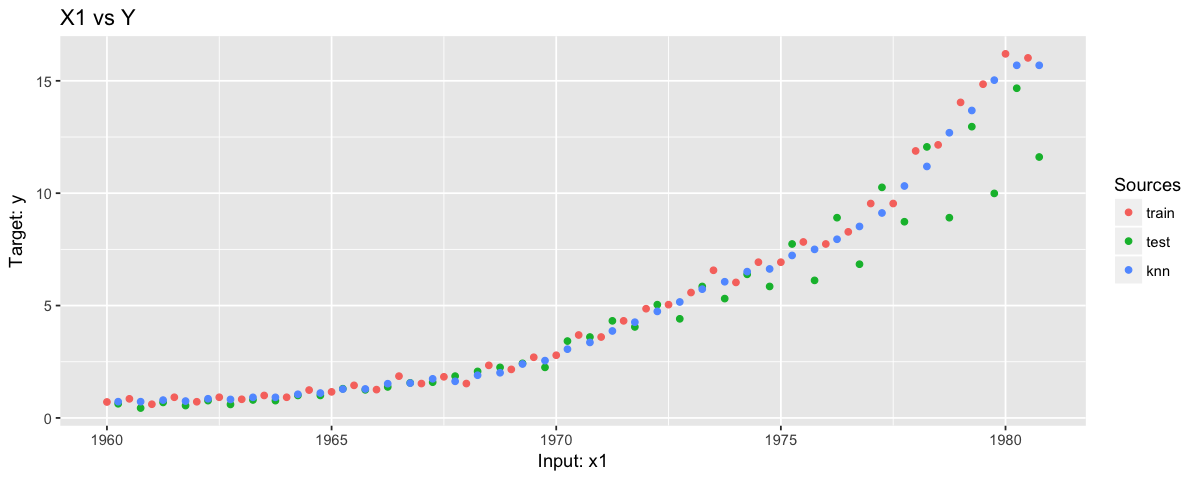

In [6]:
all <- rbind(data_for_plot, cbind(result, 'tag' = t(matrix('knn',1, nrow(ts_data)))))
options(repr.plot.width=10, repr.plot.height=4) # reset the size of plot
ggplot(data=all, aes(x=all$x1, y=all$y, color=all$tag)) + 
    geom_point() + labs(x='Input: x1', y='Target: y', color="Sources") + ggtitle("X1 vs Y")

## 2. Training and Testing error Versus K

To measure the misfit between our prediction and the training/testing set, the chosen error function is the sum of squared errors of prediction: $SSE = \sum^{N}_{n=1}{(y(x_{n})-t_{n})^2}$

In [31]:
result <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    tr_data <- train
    tr_data$y <- 0
    
    tr_label <- as.matrix(train$y)
    
    ts_data <- test
    ts_data$y <- 0
    
    # Run knn
    ts_data <- knn(tr_data, tr_label, ts_data, k)
    tr_data <- knn(tr_data, tr_label, tr_data, k)
    result[k,'train'] <- sum((train$y - tr_data$y)**2)
    result[k,'test'] <- sum((test$y - ts_data$y)**2)
}

error <- melt(result,id='K')
names(error) <- c('K','type','error')

In [44]:
x1=1/which.min(result$train); y1=min(result$train)
x2=1/which.min(result$test); y2=min(result$test)
optimal <- data.frame('K'=c(x1,x2),'Error'=c(y1,y2))

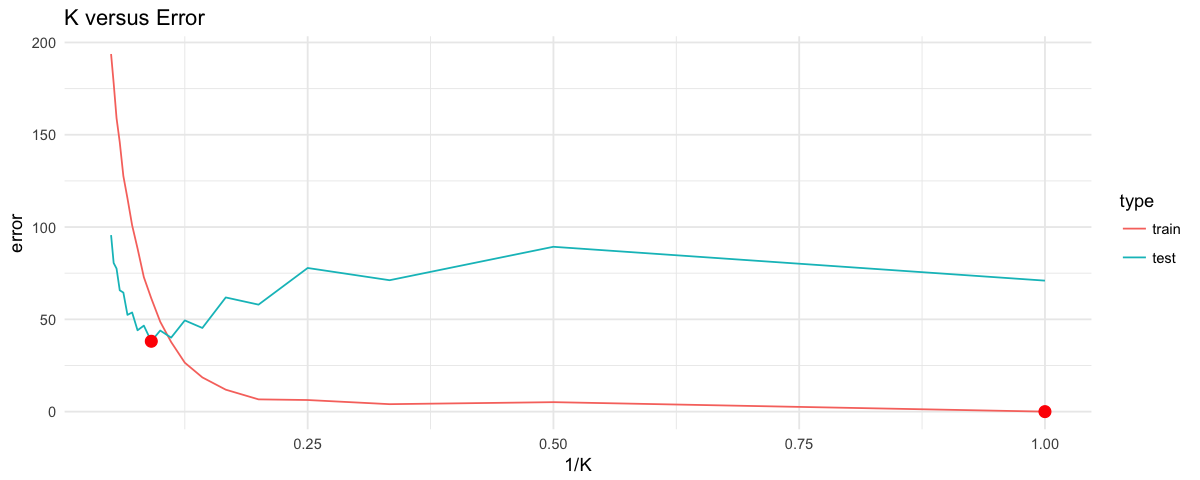

In [46]:
ggplot(data=error, aes(x=1/K, y=error, color=type)) + geom_line() + theme_minimal() + 
    ggtitle("1/K versus Error") + geom_point(data=optimal, aes(x=K,y=Error), color='red', size=3)

## 3. Report

By plotting 1/K versus the SSE of trainning set and testing set, we can find that:
1. When K=1, the training error equals to zero, while testing error is relatively high
2. As K increases (from 1 to 4), the training error doesn't change much while testing error incrementally decreases.
3. When K is larger than 4, the training error increases exponentially, where testing error will reach its minimal error at K=11.

Hence, we can conclude that:
1. When $K=1$, it is the best case for training set with 0 error, but it is also considered as 'overfitting' since the testing error is relatively high
2. When $K > 11$, both training error and testing error increases, we can consider the predictive model is being 'underfitting'.
3. From the plotting, we can also find that when K is an odd number, the error is smaller than its even neigthers (K-1, K+1). 
4. The optimal of K can be found at 9 where training error and testing error cross.